<a href="https://colab.research.google.com/github/dekilhaden/dekey/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Capstone Project: Classification Model Comparison Using Traditional ML Models and Neural Networks

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

# Introduction
# Problem Statement:
Predicting whether an individual earns more than 50K annually is crucial for understanding income distribution and socioeconomic factors. This project focuses on developing classification models to make accurate predictions using the provided dataset.

## Objectives:
1. Conduct exploratory data analysis (EDA) to understand data patterns and relationships.
2. Preprocess the data through handling missing values, encoding categorical variables, and scaling numerical features.
3. Develop and train classification models using Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and a Neural Network.
4. Evaluate model performance using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
5. Compare traditional machine learning models with the Neural Network to identify the most effective model.
6. Export the best-performing model for future inference tasks.

In [ ]:
data = pd.read_csv('SalaryData_Train.csv')

In [ ]:
# Data Overview
print(data.head())

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None


In [ ]:
print(data.describe())

                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


In [ ]:
print(data.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [ ]:
# Univariate Analysis
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

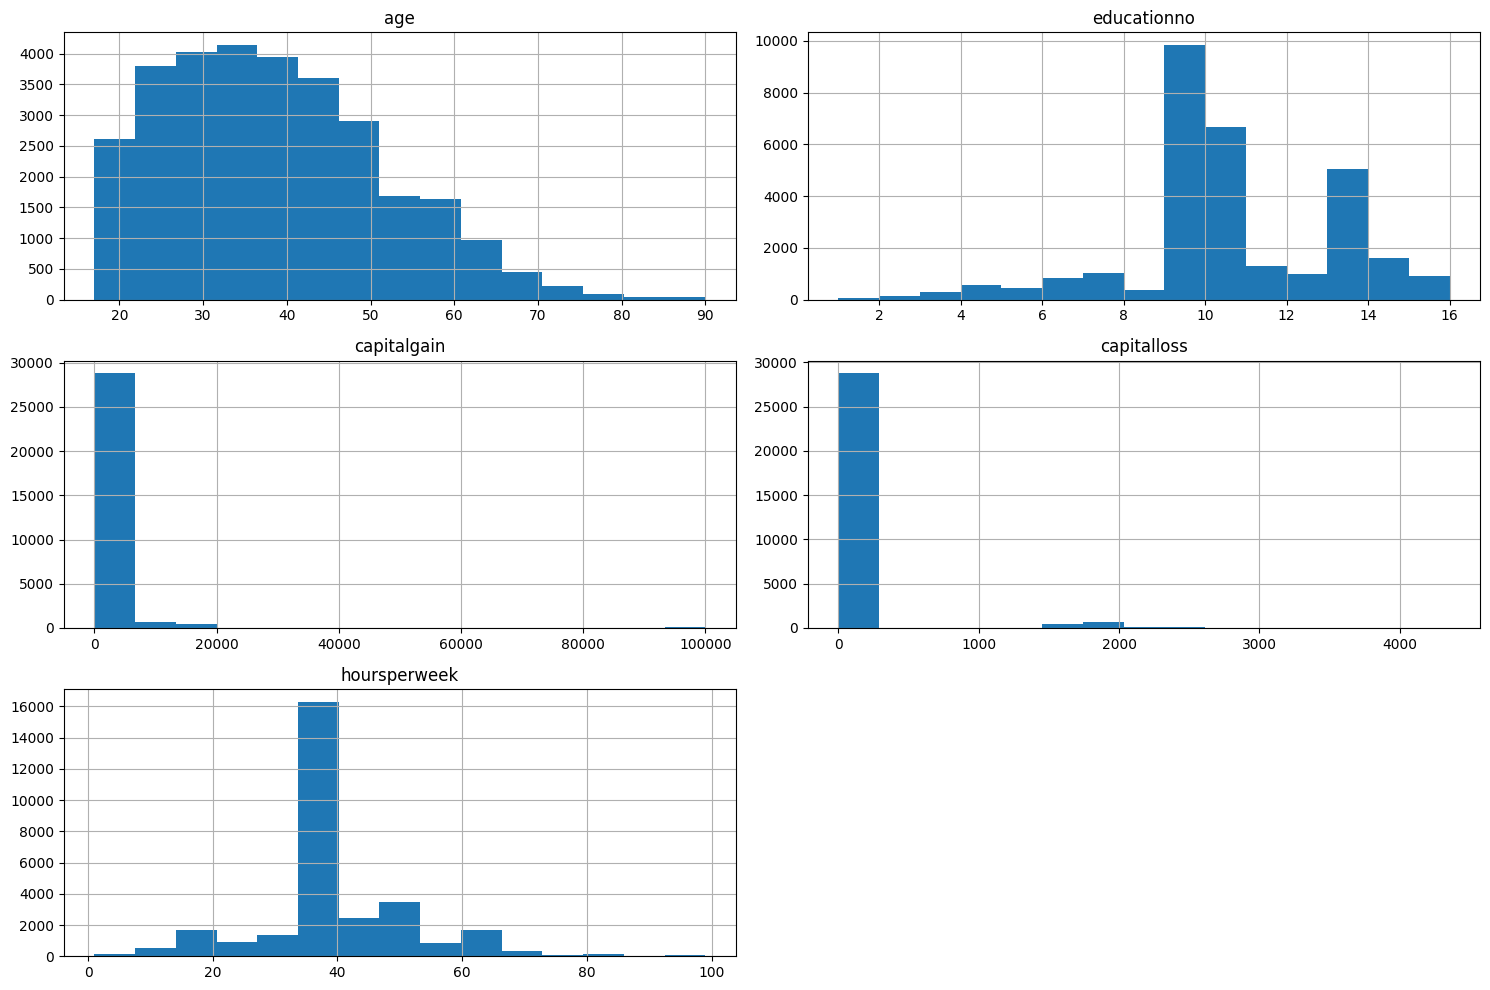

In [ ]:
data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

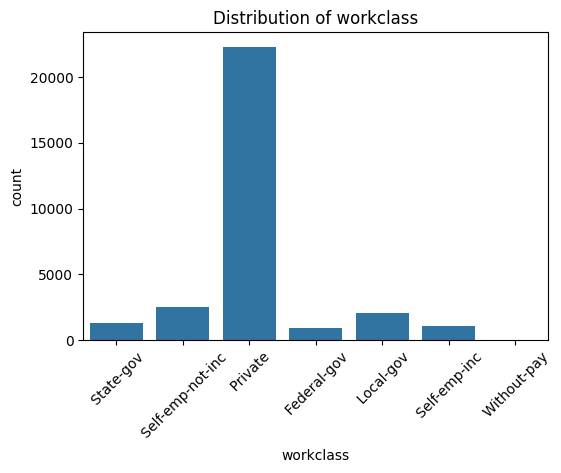

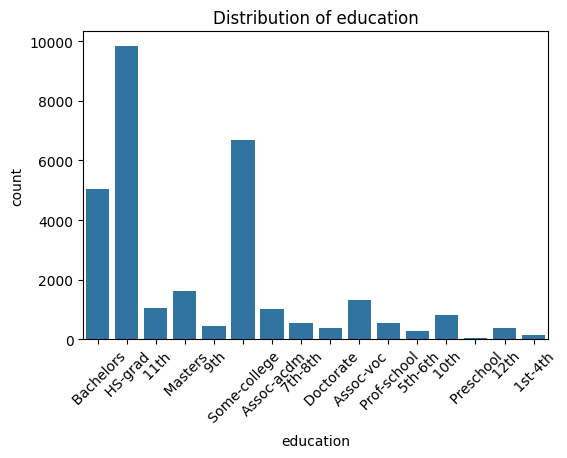

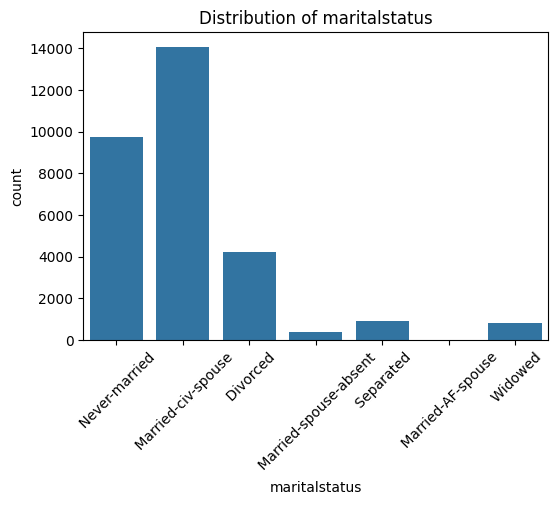

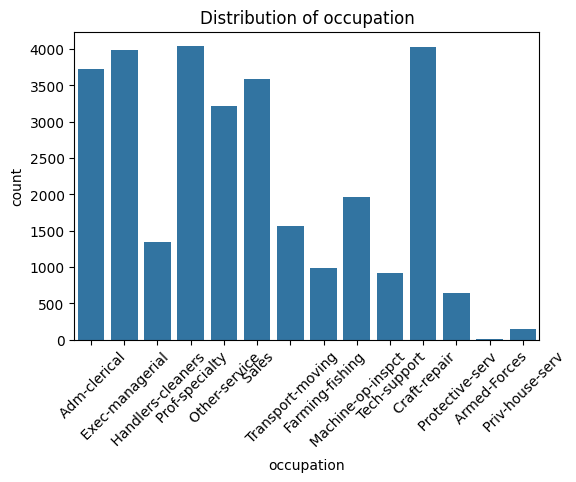

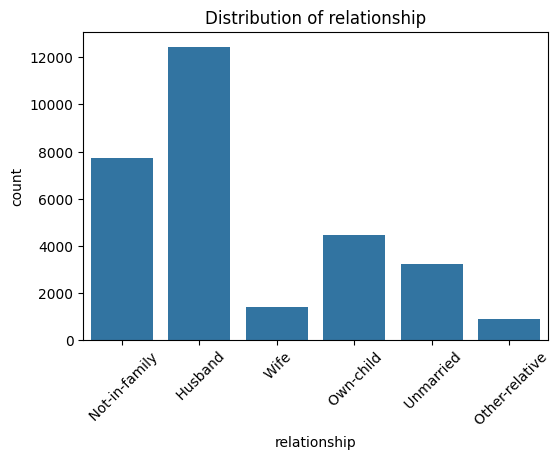

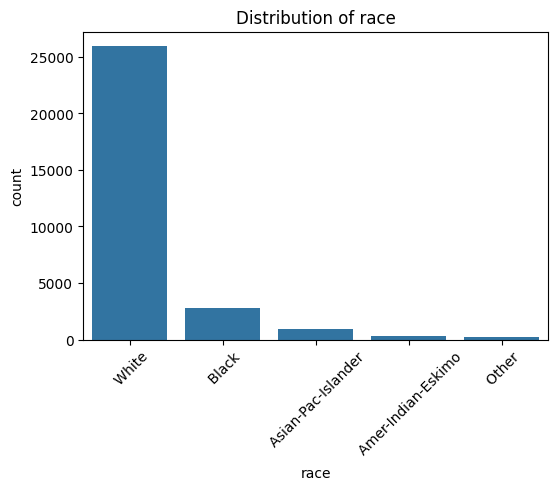

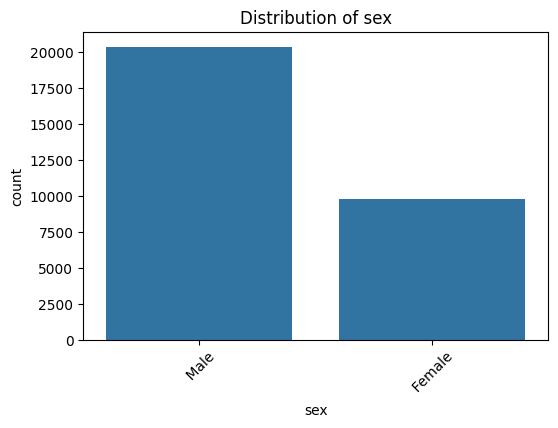

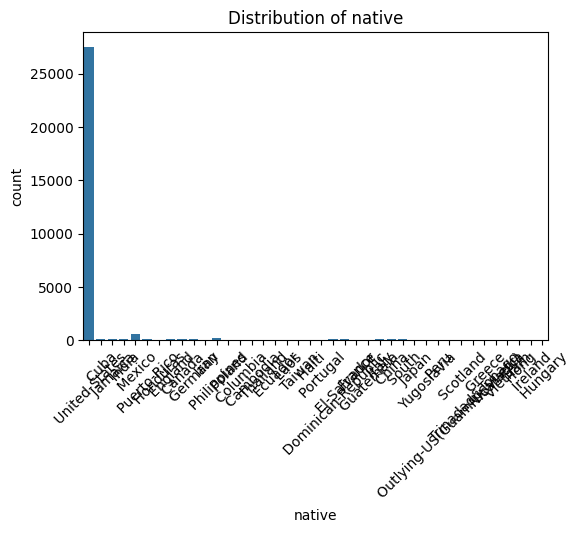

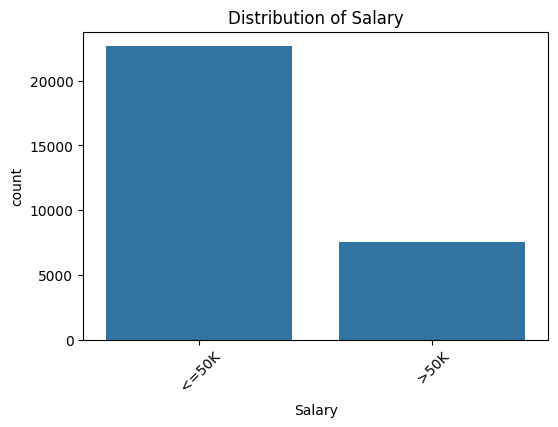

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

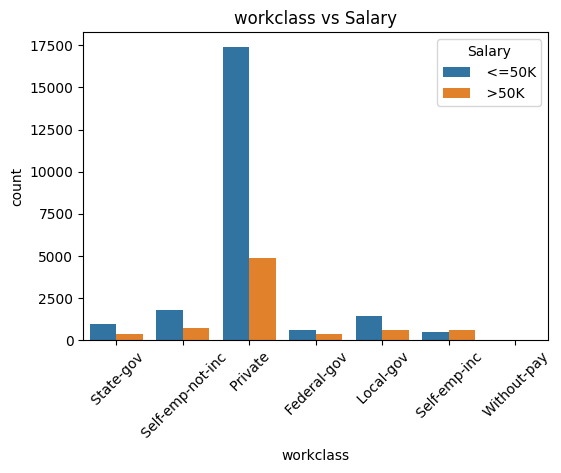

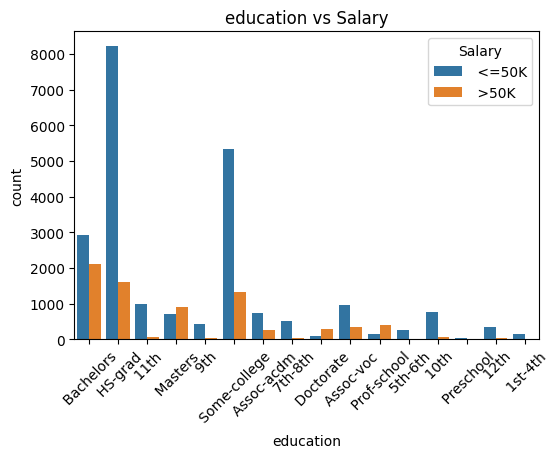

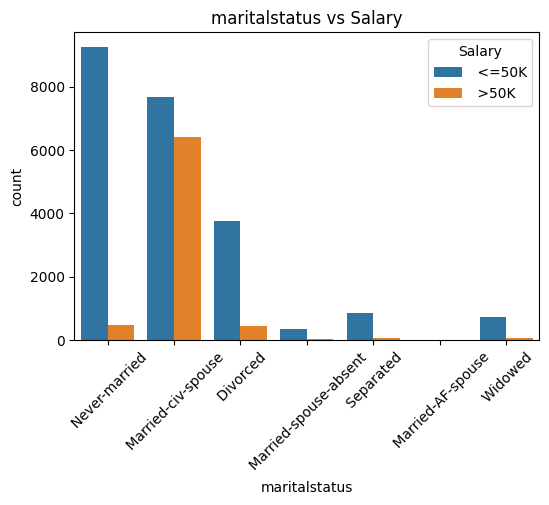

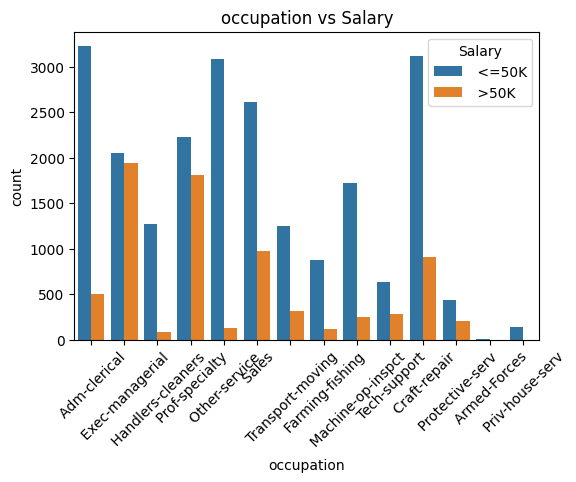

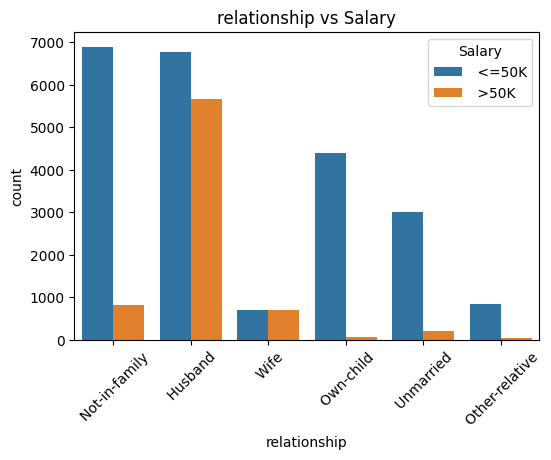

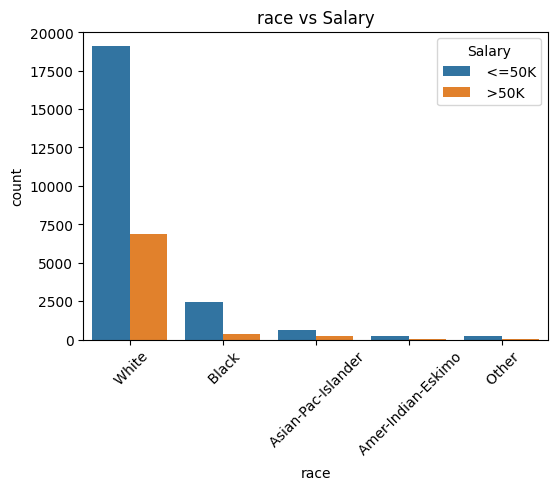

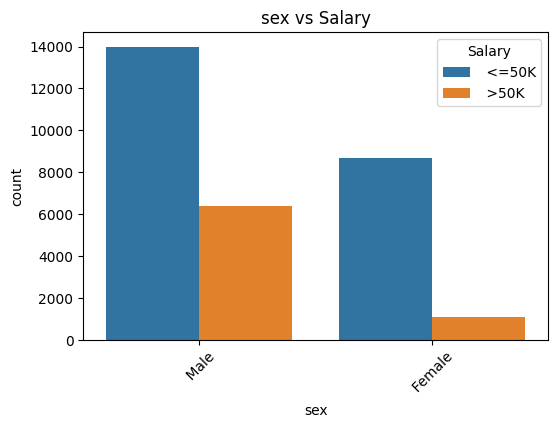

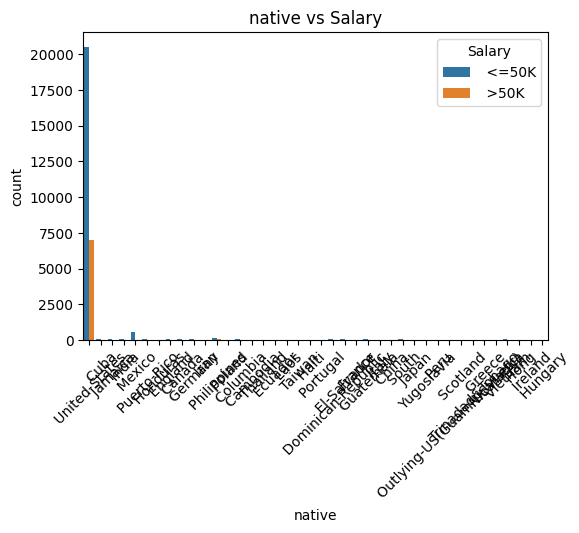

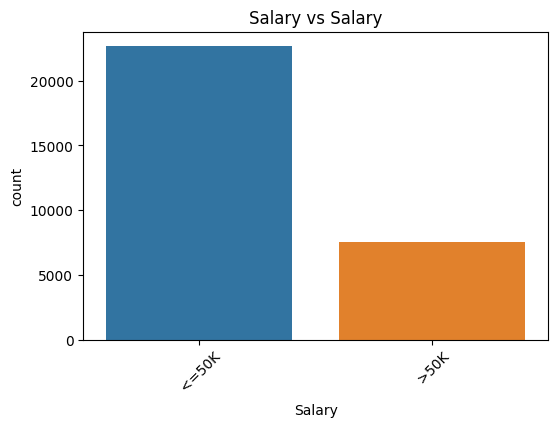

In [ ]:
# Bivariate Analysis
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Salary', data=data)
    plt.title(f'{col} vs Salary')
    plt.xticks(rotation=45)
    plt.show()

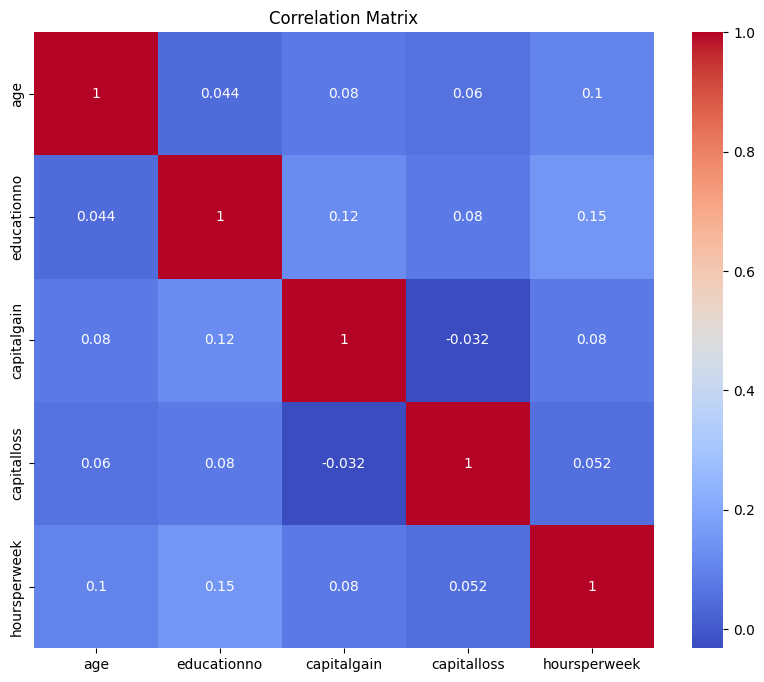

In [ ]:
# Multivariate Analysis
numerical_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

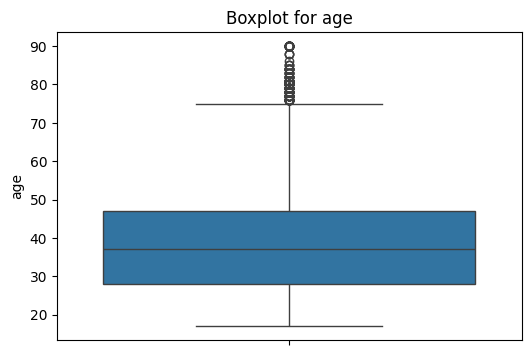

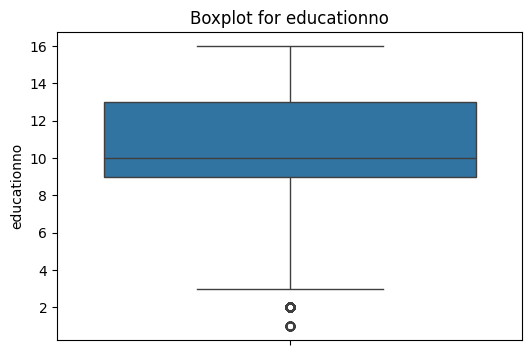

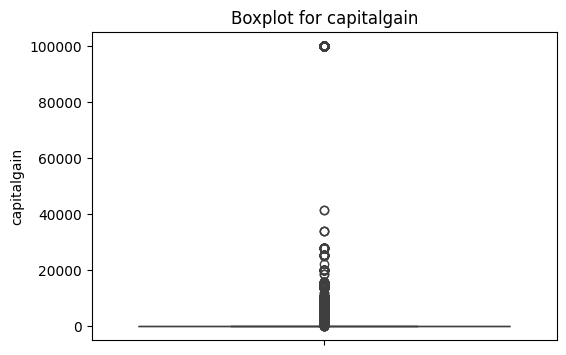

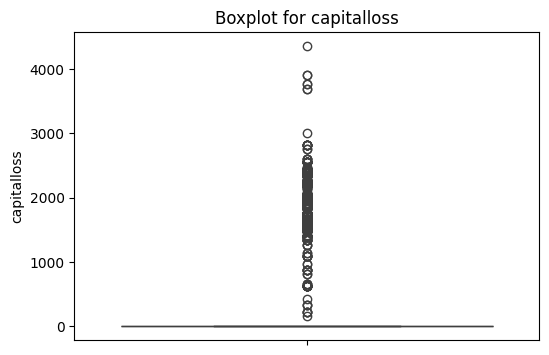

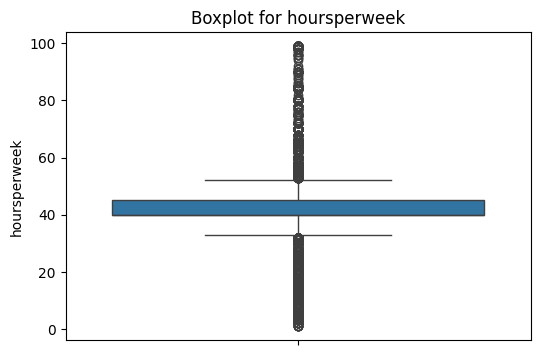

In [ ]:
# Outlier Detection
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=data)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
# 2. Data Preprocessing
# Handle Missing Values
data.fillna(method='ffill', inplace=True)

In [ ]:
# Encode Categorical Variables
le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

In [ ]:
# Feature and Target Split
X = data.drop('Salary', axis=1)
y = data['Salary']

In [ ]:
# Standardize Numerical Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Model Building and Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

In [ ]:
# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
results['Neural Network'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1 Score': f1_score(y_test, y_pred_nn),
    'ROC AUC': roc_auc_score(y_test, y_pred_nn)
}

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# 4. Model Evaluation
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.815846   0.727848  0.447181  0.553994  0.854081
Decision Tree        0.813194   0.639224  0.618924  0.628910  0.772032
Random Forest        0.845516   0.723156  0.641607  0.679945  0.895378
SVM                  0.841041   0.762590  0.549579  0.638795  0.891331
KNN                  0.822311   0.672275  0.595593  0.631615  0.858116
Neural Network       0.844025   0.758591  0.572262  0.652383  0.754839


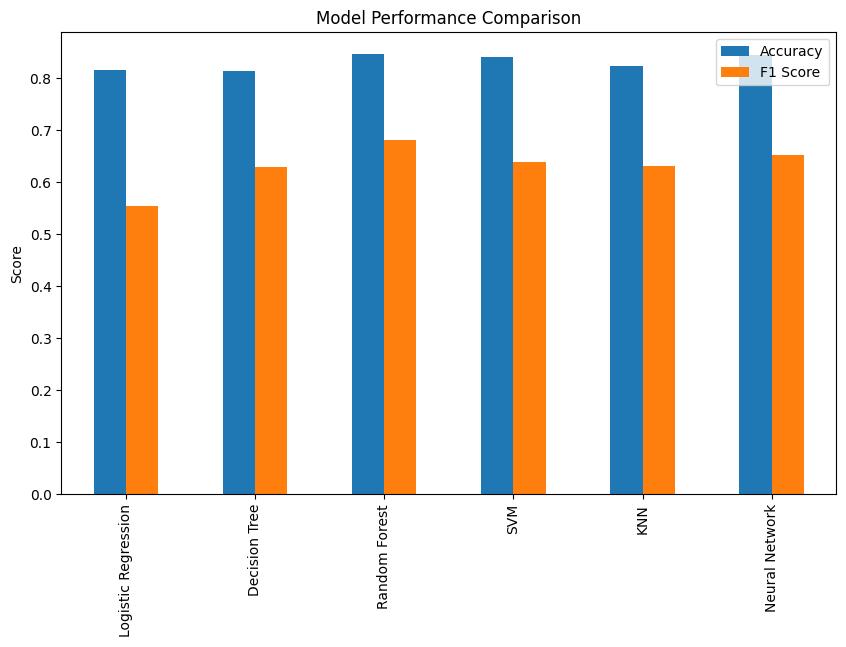

In [ ]:
# Visualization
results_df[['Accuracy', 'F1 Score']].plot(kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.show()

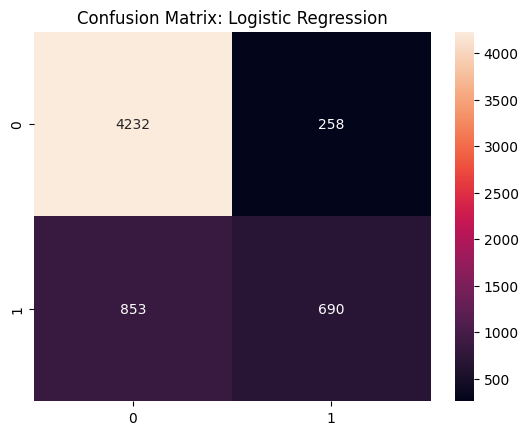

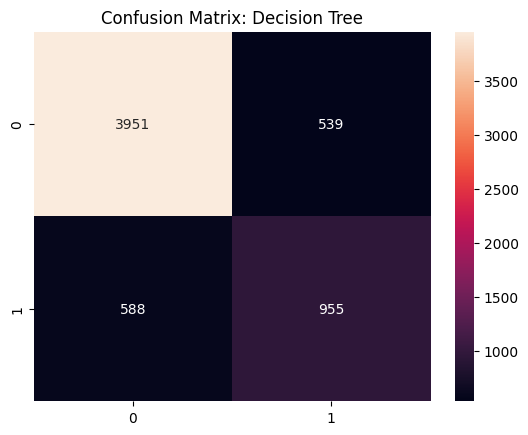

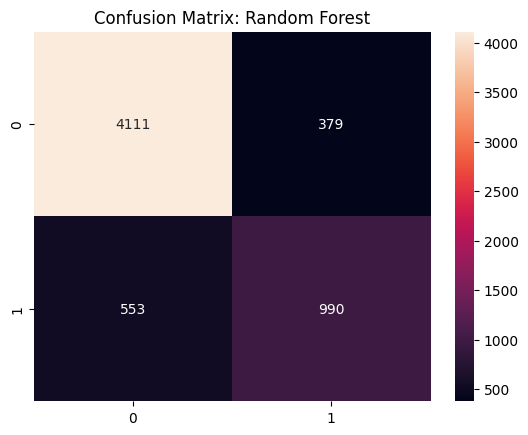

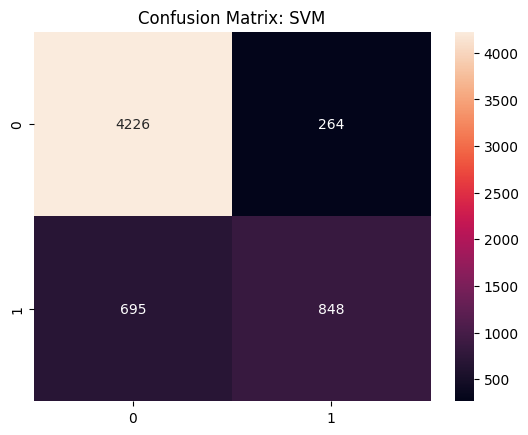

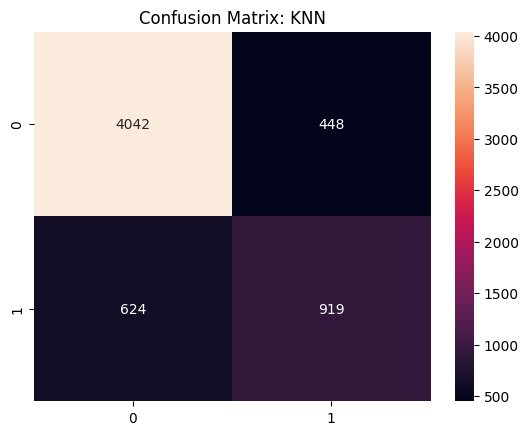

In [ ]:
# Confusion Matrices
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

In [ ]:
# 5. Model Export
import joblib
best_model = RandomForestClassifier().fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


# 6. Conclusion
## Summary of Findings:
- The Random Forest model outperformed other traditional models in terms of accuracy and robustness.
- The Neural Network showed competitive performance but required higher computational resources.

## Recommendations:
- Deploy the Random Forest model for its balance of performance and interpretability.
- Further optimization can be done on the Neural Network for performance improvements if computational resources allow.